In [22]:
import numpy as np
import matplotlib.pyplot as plt


# Declarartion des constantes
dat = 10**(-3)
n = 1000 #n+1
dr = 0.1
r0 = dr
l = 3
h = 197.326
omega = 8.6/h
E0 = 55
m_n = 939.57
V0 = 50
R0 = 5.8
a = 0.65
s = 1/2
Lambda = 0.5
V_scen = 1 # 0 if shifted harmonic potential, 1 if Wood Saxon potential

#Fonctions 
def new_r():
    tank = np.zeros(n)
    for i in range(n):
        tank[i] = r0 + dr*i
    return tank
def Enl():
    tank = np.zeros(n)
    for i in range(n):
        tank[i] = h*omega*(2*i + l + 3/2)-E0
    return tank
def V_HO(x):
    return (1/2)*m_n*(omega**2)*(x**2)-E0
def V_Sax(x):
    return -V0/(1 + np.exp((x-R0)/a))
def new_V(r,l):
    if (s==1/2):
        c = l/2
    elif(s == -1/2):
        c = -(l+1)/2
    tank = np.zeros([n,n])
    tank2 = np.zeros(n)
    if (V_scen == 0):
        for i in range(n):
            tank[i,i] = V_HO(r[i])
            tank2[i] = tank[i,i]
    if (V_scen == 1):
        for i in range(n):
            tank[i,i] = V_Sax(r[i])
            tank2[i] = tank[i,i]
    for i in range(1,n-1):
        tank[i,i] += (tank2[i+1]-tank2[i-1])*Lambda*c/(r[i]*2*dr)
    return tank

def new_T():
    tank = np.zeros([n,n])
    for i in range(n):
        tank[i,i] = 2/(dr**2)
    for i in range(n-1):
        tank[i,i+1] = -1/(dr**2)
        tank[i+1,i] = -1/(dr**2)
    return tank 

def new_L_square(r,l):
    tank = np.zeros([n,n])
    for i in range(n):
        tank[i,i] = l*(l+1)/(r[i]**2)
    return tank

r = new_r()
T = new_T()


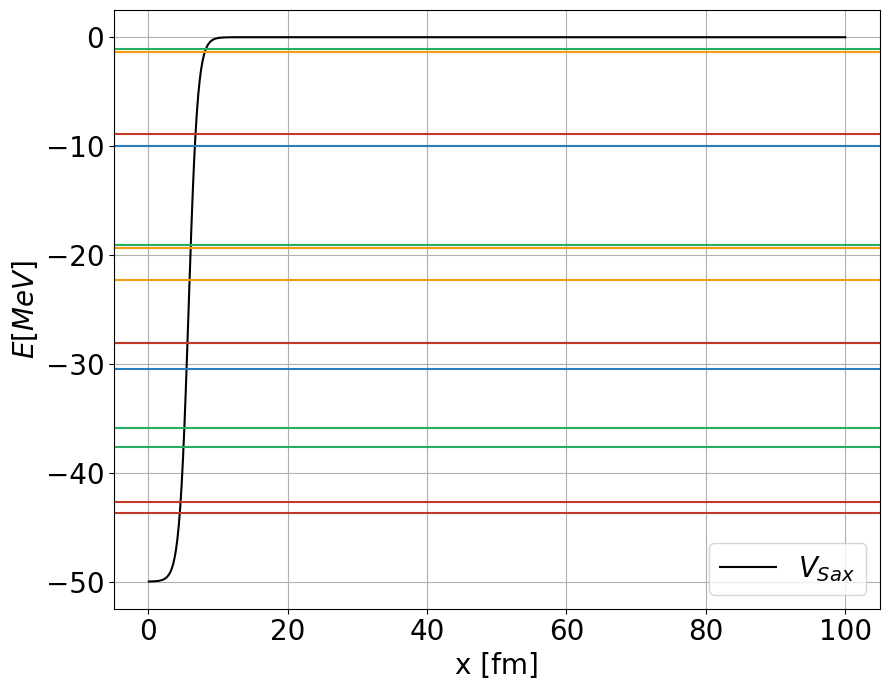

In [15]:
#Traitement des données

plt.figure(figsize=(9, 7))
plt.xlabel("x [fm]", fontsize = 20)
plt.ylabel(r"$E [MeV]$", fontsize = 20)
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)  
plt.grid(True)
plt.plot(r,V_Sax(r), color = "black", label = r"$V_{Sax}$")
colors = [
    '#C0392B',  # Rouge foncé
    '#27AE60',  # Vert foncé
    '#2980B9',  # Bleu foncé
    '#F39C12',  # Jaune foncé
    '#8E44AD',  # Violet
    '#E74C3C',  # Rouge
    '#16A085',  # Turquoise foncé
    '#2C3E50',  # Noir bleuté
    '#D35400',  # Orange foncé
    '#7F8C8D',  # Gris foncé
    '#9B59B6',  # Lavande foncé
    '#1ABC9C',  # Vert aqua foncé
    '#8E44AD',  # Violet foncé
    '#34495E',  # Bleu gris
    '#F1C40F',  # Jaune foncé
    '#A569BD',  # Mauve
    '#F39C12',  # Orange
    '#D35400',  # Brun
    '#16A085',  # Vert turquoise
    '#9A7D0A',  # Olive
    '#4B0082'   # Indigo
]
for i in range(l+1):
    V = new_V(r,l)
    L_square = new_L_square(r,i)
    H = T + L_square + 2*m_n*V/(h**2)
    eigen_value, eigen_state = np.linalg.eig(H)
    energies = (h**2)*eigen_value/(2*m_n)
    positive_indices = np.where(energies < 0)[0]
    energies = energies[positive_indices]
    eigen_state = eigen_state[:,positive_indices]
    sorted_indices = np.argsort(energies)
    energies = energies[sorted_indices]
    eigen_state = eigen_state[:,sorted_indices]

    #Energies
    for j in range(np.size(energies)):
        if (j== 0):
            plt.axhline(y = energies[j],color = colors[i])
            # label = f"l = {i}"
s = -1/2
for i in range(l+1):
    V = new_V(r,l)
    L_square = new_L_square(r,i)
    H = T + L_square + 2*m_n*V/(h**2)
    eigen_value, eigen_state = np.linalg.eig(H)
    energies = (h**2)*eigen_value/(2*m_n)
    positive_indices = np.where(energies < 0)[0]
    energies = energies[positive_indices]
    eigen_state = eigen_state[:,positive_indices]
    sorted_indices = np.argsort(energies)
    energies = energies[sorted_indices]
    eigen_state = eigen_state[:,sorted_indices]

    #Energies
    for j in range(np.size(energies)):
        plt.axhline(y = energies[j],color = colors[i])


#Traitement des données
plt.tight_layout()
plt.legend(fontsize = 20)
plt.xlim(0,15)
plt.savefig("Wood_saxon_energies_spin")
plt.show()



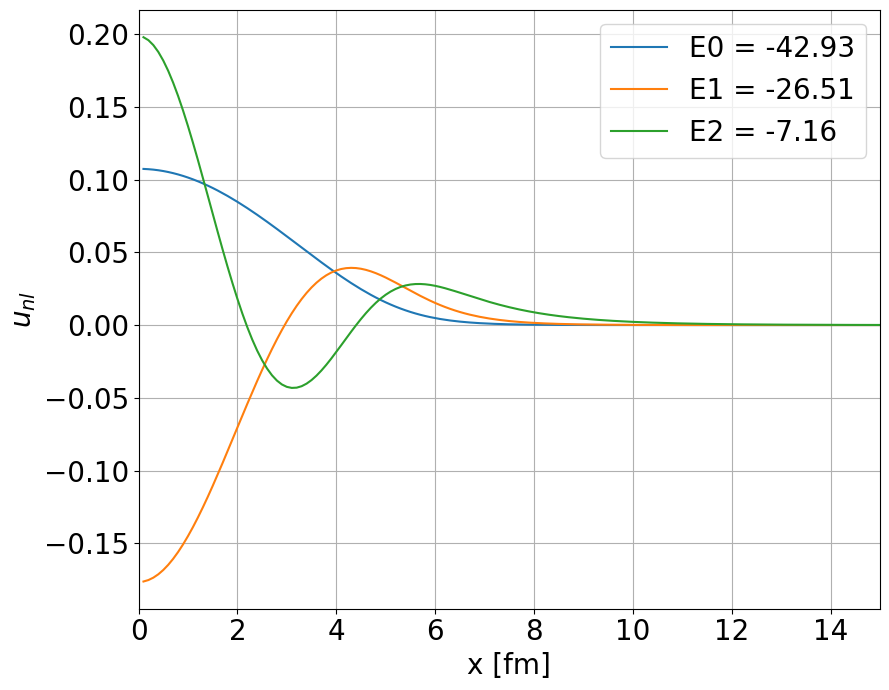

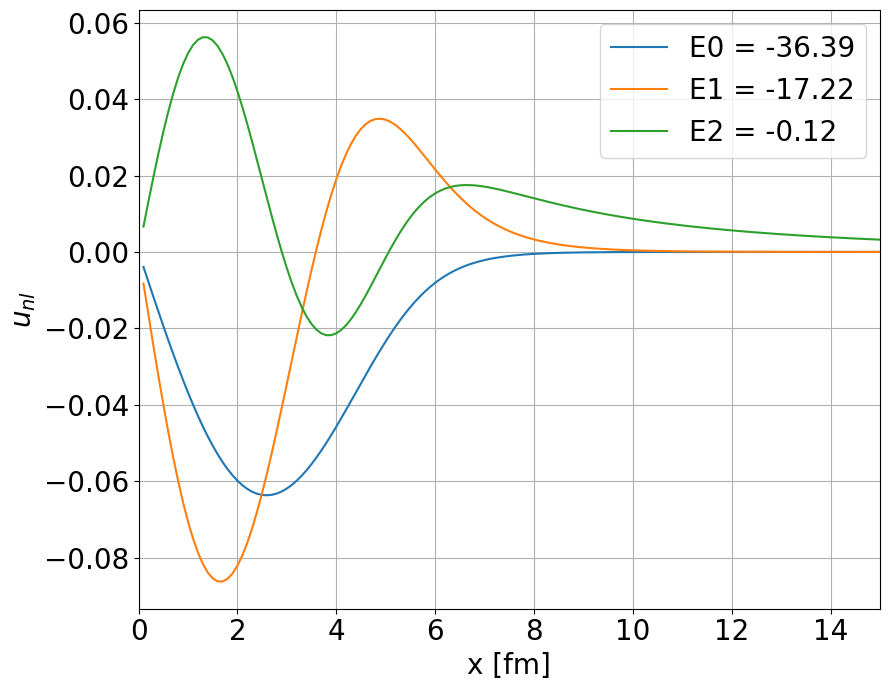

In [21]:
for i in range(l+1):
    V = new_V(r,l)
    L_square = new_L_square(r,i)
    H = T + L_square + 2*m_n*V/(h**2)
    eigen_value, eigen_state = np.linalg.eig(H)
    energies = (h**2)*eigen_value/(2*m_n)
    positive_indices = np.where(energies < 0)[0]
    energies = energies[positive_indices]
    eigen_state = eigen_state[:,positive_indices]
    sorted_indices = np.argsort(energies)
    energies = energies[sorted_indices]
    eigen_state = eigen_state[:,sorted_indices]
    plt.figure(figsize=(9, 7))
    plt.xlabel("x [fm]", fontsize = 20)
    plt.ylabel(r"$u_{nl}$", fontsize = 20)
    plt.xticks(fontsize=20)  
    plt.yticks(fontsize=20)  
    plt.grid(True)
    for j in range(np.size(energies)):
        plt.plot(r,eigen_state[:,j]/r, label = f"E{j} = {np.round(energies[j],2)}")
    plt.tight_layout()
    plt.xlim(0,15)
    plt.legend(fontsize = 20)
    plt.savefig(f"Wood_wave_l_equal_{i}_spin_plus.png")
    plt.show()